In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Disciplinas/CCF493/Atividades/AT5/breastcancerwisconsin.csv", index_col=False, squeeze=True)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df = df.drop(columns=['id','Unnamed: 32'])

In [8]:
df['diagnosis'] = df['diagnosis'].apply(lambda item: 1 if item == 'M' else 0)

In [10]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [18]:
def classificacao_mlp(df, target):
    
    print("\n--- CLASSIFICAÇÃO - ALGORITMO ---")
    X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=[target]), df[target], test_size=0.20, random_state=42, 
                                                        shuffle=False)

    tempo_exec_inicial = time.time()

    # https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
    # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

    mlp = MLPClassifier(alpha=1, max_iter=1000)
    mlp.fit(X_train, Y_train)
    print("\n\nAccuracy (MLP) = %.2f" % (100 * np.sum(mlp.predict(X_test) == Y_test)/len(Y_test)))

    scores_mlp = cross_val_score(mlp, df.drop(columns=[target]), df[target], cv=10)
    print("\n\nAccuracy (MLP - Validação cruzada) = %.2f (+/- %.2f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

    print("\n\nMLP (precision, recall, fscore)\n")
    # precision_recall_fscore_support(Y_test, mlp.predict(X_test), average=None, labels=df_treino_numerico['Survived'])
    print(classification_report(Y_test, mlp.predict(X_test)))

    tempo_exec_final = time.time()

    # print("\n\nMLP")
    print("\n\nTempo de execução (MLP): %.4f s" % (tempo_exec_final - tempo_exec_inicial))

    print("\n\nMLP - Matriz de confusão\n")
    print(confusion_matrix(Y_test, mlp.predict(X_test)))

    print("\n\nPlot da matriz de confusão:\n")
    plot_confusion_matrix(mlp, X_test, Y_test, values_format='d')
    plt.show()

In [41]:

def classificacao(df, model, target):
    
    print("\n--- CLASSIFICAÇÃO - ALGORITMO ---")
    X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=[target]), df[target], test_size=0.20, random_state=None, 
                                                        shuffle=False)

    tempo_exec_inicial = time.time()

    # https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
    # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

    #model = DecisionTreeClassifier(random_state=0)    
    model.fit(X_train, Y_train)
    print("\n\nAccuracy = %.2f" % (100 * np.sum(model.predict(X_test) == Y_test)/len(Y_test)))

    scores_mlp = cross_val_score(model, df.drop(columns=[target]), df[target], cv=10)
    print("\n\nAccuracy (Validação cruzada) = %.2f (+/- %.2f)" % (scores_mlp.mean(), scores_mlp.std() * 2))

    print("\n\n(precision, recall, fscore)\n")
    # precision_recall_fscore_support(Y_test, mlp.predict(X_test), average=None, labels=df_treino_numerico['Survived'])
    print(classification_report(Y_test, model.predict(X_test)))

    tempo_exec_final = time.time()

    # print("\n\nMLP")
    print("\n\nTempo de execução: %.4f s" % (tempo_exec_final - tempo_exec_inicial))

    print("\n\nMatriz de confusão\n")
    print(confusion_matrix(Y_test, model.predict(X_test)))

    print("\n\nPlot da matriz de confusão:\n")
    plot_confusion_matrix(model, X_test, Y_test, values_format='d')
    plt.show()


--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy = 94.74


Accuracy (Validação cruzada) = 0.91 (+/- 0.06)


(precision, recall, fscore)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.88      0.88      0.88        26

    accuracy                           0.95       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.95      0.95      0.95       114



Tempo de execução: 0.1450 s


Matriz de confusão

[[85  3]
 [ 3 23]]


Plot da matriz de confusão:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


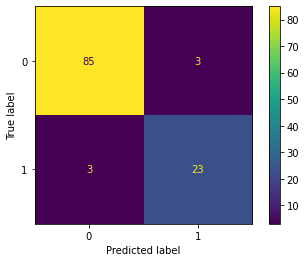


--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy = 92.98


Accuracy (Validação cruzada) = 0.91 (+/- 0.08)


(precision, recall, fscore)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        88
           1       0.82      0.88      0.85        26

    accuracy                           0.93       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.93      0.93      0.93       114



Tempo de execução: 0.1179 s


Matriz de confusão

[[83  5]
 [ 3 23]]


Plot da matriz de confusão:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


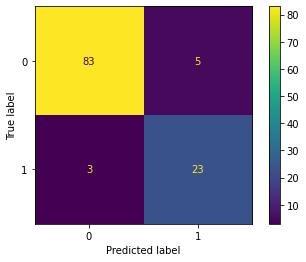

In [68]:
#model = MLPClassifier(alpha=1, max_iter=1000)
#classificacao(df, model, 'diagnosis')


#model = DecisionTreeClassifier(random_state=0)
#classificacao(df, model, 'diagnosis')

model = svm.SVC()
#model = RandomForestClassifier(max_depth=None, random_state=0)
classificacao(df, model, 'diagnosis')

model = svm.SVC()
#model = RandomForestClassifier(max_depth=None, random_state=0)
classificacao(df_pca, model, 'diagnosis')



In [80]:

pca = decomposition.PCA(n_components=20)
pca.fit(df)
X = pca.transform(df)

In [27]:
X

array([[1160.14274385, -293.91753487,   48.57838829,   -8.71977365],
       [1269.12259735,   15.63019385,  -35.39433793,   17.86050902],
       [ 995.7940818 ,   39.15672295,   -1.7099218 ,    4.19611699],
       ...,
       [ 314.50204562,   47.55342261,  -10.44324763,   -9.77775872],
       [1124.85828992,   34.12921837,  -19.74220047,  -23.65584083],
       [-771.52771076,  -88.64311299,   23.88898053,    2.54937566]])

In [81]:
df_pca = pd.DataFrame(X)
df_pca['diagnosis'] = df['diagnosis']
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,diagnosis
0,1160.142744,-293.917535,48.578388,-8.719774,31.996874,1.263545,0.924067,0.144360,0.808440,0.633421,0.126103,-0.215545,0.044104,0.034854,0.065403,-0.014231,-0.006033,0.017074,0.010671,-0.008411,1
1,1269.122597,15.630194,-35.394338,17.860509,-4.328328,-0.223888,-0.039345,0.203982,-0.534110,-0.212888,0.137369,-0.017364,0.036048,0.045646,-0.011943,0.023555,-0.024331,0.013412,-0.005600,0.016633,1
2,995.794082,39.156723,-1.709922,4.196117,-0.464399,-2.651694,-0.774756,-0.271631,-0.219857,-0.319020,0.110063,0.188766,-0.020570,0.083565,0.022735,-0.026450,-0.041538,0.006336,-0.028203,0.004831,1
3,-407.180411,-67.380505,8.671338,-11.778002,7.114740,1.302300,-1.256613,-0.054818,-0.443898,-0.594533,0.548897,0.674274,-0.177660,0.282556,0.082784,0.041654,-0.038235,0.031138,-0.016438,-0.045764,1
4,930.341382,189.340710,1.374512,8.490845,7.617376,1.023057,-0.329082,0.292114,-0.021432,-0.315856,0.160365,-0.075662,-0.058406,-0.114034,-0.005617,-0.017531,0.026913,-0.014448,0.004898,-0.003732,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1414.126817,110.222522,40.066082,6.562605,-5.100349,-0.394650,-0.783458,0.038915,-0.480109,-0.256181,-0.039930,0.120875,0.052221,-0.075015,-0.017770,-0.060164,-0.054059,-0.007518,-0.011867,0.003591,1
565,1045.019040,77.057573,0.036503,-4.750470,-12.419176,-0.059335,0.450565,0.509526,-0.440210,0.415060,0.283247,-0.007121,0.056319,-0.015117,0.008656,0.003677,-0.020562,0.004046,0.001967,0.003508,1
566,314.502046,47.553423,-10.443248,-9.777759,-6.157872,-0.869629,-2.160827,-0.439412,-0.146863,-0.263151,0.080729,-0.200588,0.081597,-0.004235,-0.065845,-0.008641,0.002951,0.012573,-0.003181,0.007783,1
567,1124.858290,34.129218,-19.742200,-23.655841,3.555792,4.082669,-1.717466,-0.364939,0.468857,0.687443,0.152532,0.440075,-0.038805,0.060010,-0.019199,-0.036788,0.005575,0.008181,0.042296,0.012645,1


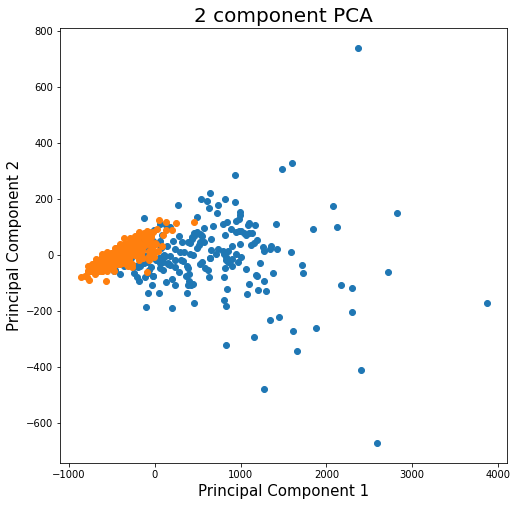

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['diagnosis'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 0], df_pca.loc[indicesToKeep, 1])

In [82]:
np.round(pca.explained_variance_ratio_,3)

array([0.982, 0.016, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [57]:
pca.explained_variance_ratio_.cumsum()

array([0.98204444, 0.99822092, 0.99977844, 0.99989943])


--- CLASSIFICAÇÃO - ALGORITMO ---


Accuracy (MLP) = 89.47


Accuracy (MLP - Validação cruzada) = 0.92 (+/- 0.07)


MLP (precision, recall, fscore)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93        88
           1       0.69      0.96      0.81        26

    accuracy                           0.89       114
   macro avg       0.84      0.92      0.87       114
weighted avg       0.92      0.89      0.90       114



Tempo de execução (MLP): 0.1476 s


MLP - Matriz de confusão

[[77 11]
 [ 1 25]]


Plot da matriz de confusão:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


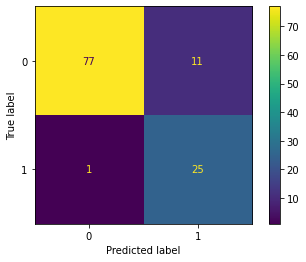

In [35]:
classificacao_dt(df_pca, 'diagnosis')